<a href="https://colab.research.google.com/github/imemmul/GenerativeNFT/blob/pix2pix/stable_diffusion_fineTune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 6.3 MB/s eta 0:00:00


In [2]:
!pip install git+https://github.com/huggingface/diffusers.git

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-utrubda0
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-utrubda0
  Resolved https://github.com/huggingface/diffusers.git to commit bc7a4d4917456afd70913be85bd25c556c25862c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.2 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.22.0.dev0-py3-none-any.whl size=1577476 sha256=d5c1bf592b7287540d43cd5af6bdb8efde563c12b661646b3c1307c3f8a82e06
  Stored in directory: /tmp/pip-ephem-wheel-cache-mbk5hhy4/wheels/4d/b7/a8/6f9549ceec5daad78675b857ac57d697c387062506520a7b50
Successfully built diffusers


In [3]:
!git clone https://github.com/huggingface/diffusers
%cd diffusers
!pip install .

Cloning into 'diffusers'...
remote: Enumerating objects: 40550, done.
remote: Counting objects: 100% (360/360), done.
remote: Compressing objects: 100% (163/163), done.
remote: Total 40550 (delta 219), reused 256 (delta 160), pack-reused 40190
Receiving objects: 100% (40550/40550), 26.99 MiB | 16.33 MiB/s, done.
Resolving deltas: 100% (30013/30013), done.
/content/diffusers
Processing /content/diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.22.0.dev0-py3-none-any.whl size=1577476 sha256=9b2d024b4123d700a00eb3e07227cff1b7f33106b2ba9f99af80fed3f115765b
  Stored in directory: /tmp/pip-ephem-wheel-cache-q3fvi6_0/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.22.0.dev0
    Uninstalling diffusers-0.22.0.dev0:
      Succ

In [4]:
!pip install accelerate>=0.16.0
!pip install torchvision
!pip install transformers>=4.25.1
!pip install datasets
!pip install ftfy
!pip install tensorboard
!pip install Jinja2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.0 MB/s eta 0:00:00


In [5]:
!python3 -m pip install --upgrade tensorrt

  Preparing metadata (setup.py) ... done
  Created wheel for tensorrt: filename=tensorrt-8.6.1.post1-py2.py3-none-any.whl size=17281 sha256=68d2e25f9b73fc2198030dcfc17586872448bf5bef9c7a7a67241667b4f3c9f8
  Stored in directory: /root/.cache/pip/wheels/f4/c8/0e/b79b08e45752491b9acfdbd69e8a609e8b2ed7640dda5a3e59
Successfully built tensorrt


In [6]:
!nvidia-smi

Sun Oct 22 15:06:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
!accelerate config

----------------------------------------------------------------------------------------------------In which compute environment are you running?
Please input a choice index (starting from 0), and press enter
 ➔  This machine
    AWS (Amazon SageMaker)
0
This machine
----------------------------------------------------------------------------------------------------Which type of machine are you using?
Please input a choice index (starting from 0), and press enter
 ➔  No distributed training
    multi-CPU
    multi-XPU
    multi-GPU
    multi-NPU
    TPU
0
No distributed training
Do you want to run your training on CPU only (even if a GPU / Apple Silicon / Ascend NPU device is available)? [yes/NO]:NO
Do you wish to optimize your script with torch dynamo?[yes/NO]:NO
Do you want to use DeepSpeed? [yes/NO]: NO
What GPU(s) (by id) should be used for training on this machine as a comma-seperated list? [all]:0
-----------------------------------------------------------------------------------

In [8]:
import tensorrt
print(tensorrt.__version__)
assert tensorrt.Builder(tensorrt.Logger())

8.6.1


In [9]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) N
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [10]:
!pwd

/content/diffusers


In [11]:
%cd '/content/diffusers/examples'
!ls

/content/diffusers/examples
community	  inference		  research_projects  unconditional_image_generation
conftest.py	  instruct_pix2pix	  t2i_adapter	     wuerstchen
controlnet	  kandinsky2_2		  test_examples.py
custom_diffusion  README.md		  text_to_image
dreambooth	  reinforcement_learning  textual_inversion


In [12]:
%cd '/content/diffusers/examples/text_to_image'
!ls

/content/diffusers/examples/text_to_image
README.md	       requirements.txt			 train_text_to_image.py
README_sdxl.md	       train_text_to_image_flax.py	 train_text_to_image_sdxl.py
requirements_flax.txt  train_text_to_image_lora.py
requirements_sdxl.txt  train_text_to_image_lora_sdxl.py


In [13]:
!pip show diffusers

Name: diffusers
Version: 0.22.0.dev0
Summary: State-of-the-art diffusion in PyTorch and JAX.
Home-page: https://github.com/huggingface/diffusers
Author: The HuggingFace team
Author-email: patrick@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, importlib-metadata, numpy, Pillow, regex, requests, safetensors
Required-by: 


In [14]:
!pip install --upgrade diffusers transformers scipy

In [15]:
!pip install --upgrade diffusers

In [16]:
!pip install pytest

In [1]:
import torch
from diffusers import StableDiffusionPipeline

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"


pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]

image.save("astronaut_rides_horse.png")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

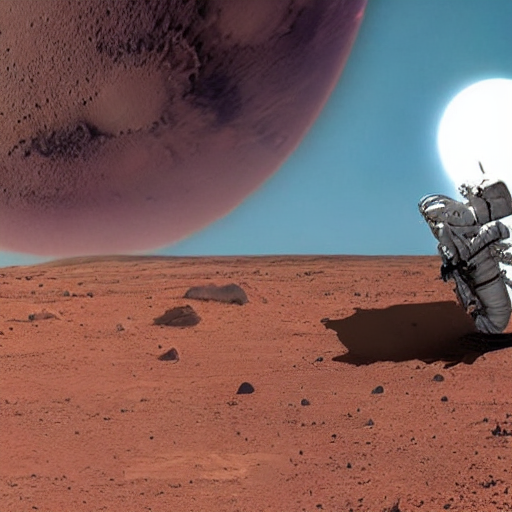

In [2]:
from IPython.display import Image
Image(filename="astronaut_rides_horse.png")

In [3]:
!ls /content/diffusers

'=0.16.0'       CODE_OF_CONDUCT.md   examples	   PHILOSOPHY.md    setup.cfg   _typos.toml
'=4.25.1'       CONTRIBUTING.md      LICENSE	   pyproject.toml   setup.py    utils
 build	        docker		     Makefile	   README.md	    src
 CITATION.cff   docs		     MANIFEST.in   scripts	    tests


In [4]:
%cd '/content/diffusers/examples/text_to_image'

/content/diffusers/examples/text_to_image


In [5]:
!ls

README.md	       requirements.txt			 train_text_to_image.py
README_sdxl.md	       train_text_to_image_flax.py	 train_text_to_image_sdxl.py
requirements_flax.txt  train_text_to_image_lora.py
requirements_sdxl.txt  train_text_to_image_lora_sdxl.py


In [6]:
import torch
torch.cuda.is_available()

True

In [7]:
!echo $LD_LIBRARY_PATH

/usr/lib64-nvidia


In [8]:
!find / -name "libnvinfer.so.*"

find: ‘/proc/55/task/55/net’: Invalid argument
find: ‘/proc/55/net’: Invalid argument
/usr/local/lib/python3.10/dist-packages/tensorrt_libs/libnvinfer.so.8


In [9]:
import os


tensorrt_path = "/usr/local/lib/python3.10/dist-packages/tensorrt_libs"
os.environ["LD_LIBRARY_PATH"] = f"/usr/lib64-nvidia:{tensorrt_path}:" + os.environ.get("LD_LIBRARY_PATH", "")

In [10]:
!nvidia-smi

Sun Oct 22 15:11:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    30W /  70W |   4015MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
!pip install evaluate
!pip install datasets==2.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.3/362.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 7.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: dill
    Found existing installation: dill 0.3.7
    Uninstalling dill-0.3.7:
      Successfully uninstalled dill-0.3.7
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.15
    Uninstalling multiprocess-0.70.15:
      Successfully uninstalled multiprocess-0.70.15
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.5
    Uninstalling datasets-2.14.5:
   

In [12]:
from diffusers import StableDiffusionPipeline


model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)

print(pipe)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.22.0.dev0",
  "_name_or_path": "CompVis/stable-diffusion-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}



In [16]:
#!export MODEL_NAME="runwayml/stable-diffusion-v1-5"
#!export HUB_MODEL_ID="pokemon-lora"
#!export DATASET_NAME="lambdalabs/pokemon-blip-captions"

#!accelerate launch --mixed_precision="fp16"  train_text_to_image_lora.py \
#  --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5" \
#  --dataset_name=$DATASET_NAME \
#  --dataloader_num_workers=8 \
#  --resolution=512 --center_crop --random_flip \
#  --train_batch_size=1 \
#  --gradient_accumulation_steps=4 \
#  --max_train_steps=15000 \
#  --learning_rate=1e-04 \
#  --max_grad_norm=1 \
#  --lr_scheduler="cosine" --lr_warmup_steps=0 \
#  --output_dir="sd-pokemon-model" \
#  --push_to_hub \
#  --hub_model_id=${HUB_MODEL_ID} \
#  --report_to=wandb \
#  --checkpointing_steps=500 \
#  --validation_prompt="Totoro" \
#  --seed=1337

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:382: UserWarning: `log_with=wandb` was passed but no supported trackers are currently installed.
  warnings.warn(f"`log_with={log_with}` was passed but no supported trackers are currently installed.")
Traceback (most recent call last):
  File "/content/diffusers/examples/text_to_image/train_text_to_image_lora.py", line 927, in <module>
    main()
  File "/content/diffusers/examples/text_to_image/train_text_to_image_lora.py", line 385, in main
    raise ImportError("Make sure to install wandb if you want to use it for logging during training.")
ImportError: Make sure to install wandb if you want to use it for logging during training.
Traceback (most recent call last):
  File "/usr/local/bin/accelerate", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/accelerate/commands/accelerate_cli.py", line 47, in main
    args.func(args)
  File "/usr/local/lib/python3.10/dist-packages/accelera

In [ ]:
#!export dataset_name="lambdalabs/pokemon-blip-captions"

!accelerate launch train_text_to_image_lora.py \
  --pretrained_model_name_or_path="CompVis/stable-diffusion-v1-4" \
  --dataset_name="lambdalabs/pokemon-blip-captions" \
  --resolution=512 --center_crop --random_flip \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --gradient_checkpointing \
  --mixed_precision="fp16" \
  --max_train_steps=15000 \
  --learning_rate=1e-05 \
  --max_grad_norm=1 \
  --lr_scheduler="constant" --lr_warmup_steps=0 \
  --output_dir="sd-pokemon-model"

10/22/2023 15:26:42 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

{'thresholding', 'prediction_type', 'sample_max_value', 'variance_type', 'dynamic_thresholding_ratio', 'timestep_spacing', 'clip_sample_range'} was not found in config. Values will be initialized to default values.
{'norm_num_groups', 'force_upcast'} was not found in config. Values will be initialized to default values.
{'resnet_out_scale_factor', 'num_attention_heads', 'resnet_skip_time_act', 'time_embedding_type', 'class_embeddings_concat', 'addition_embed_type_num_heads', 'attention_type', 'time_embedding_dim', 'upcast_attention', 'encoder_hid_dim_type', 'mid_block_only_cross_attention', 'resnet_time_scale_shift', 'conv_in_kernel', 'addition_time_embed_dim', 'timestep_post_act', 'use_linear_projection', 'projection_class_embeddings_input_dim', 'class_embed_type', 'encoder_hid_dim', 'cross_attention_norm', 'conv_out_ker